# 1. Import Libraries and Load Data

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
houses_prices_df = pd.read_csv('../datasets/houses_prices_dataset.csv')

# Normalize the House Price column
houses_prices_df['House Price'] = houses_prices_df['House Price'] / 1000

# Display the first few rows
print(houses_prices_df.head())

   House Size (sq meters)  House Price
0              238.202617   514.068249
1              170.007860   313.060540
2              198.936899   372.464098
3              250.000000   519.387934
4              243.377900   463.293331


# 2. Data Visualization
Visualize the data to understand its distribution and to check the relationship between house size and price.

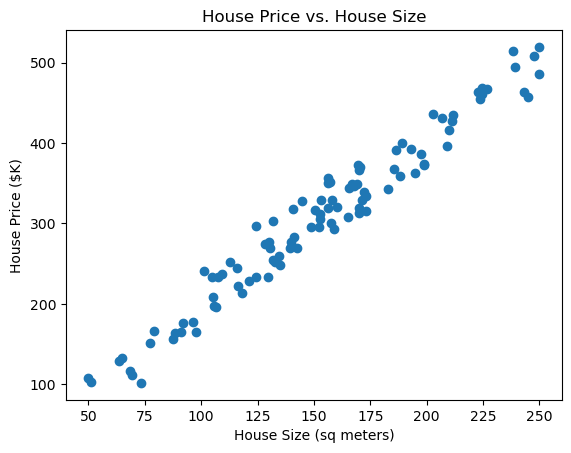

In [25]:
plt.scatter(houses_prices_df['House Size (sq meters)'], houses_prices_df['House Price'])
plt.xlabel('House Size (sq meters)')
plt.ylabel('House Price ($K)')
plt.title('House Price vs. House Size')
plt.show()

# 3. Initialize Parameters
Define your initial parameters for the model (w and b).

In [28]:
w = 0  # Initial weight
b = 0  # Initial bias

# 4. Define the Cost Function
Implement the MSE cost function.

$ MSE = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2 $


In [30]:
def compute_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# 5.Implement Gradient Calculation
Implement functions to calculate the gradients of MSE with respect to w and b

In [31]:
def gradients(X, y, y_pred):
    dw = -(2/len(X)) * np.sum(X * (y - y_pred))
    db = -(2/len(X)) * np.sum(y - y_pred)
    return dw, db

# 6. Implement Gradient Descent
Write the function for gradient descent, which iteratively updates w and b.

In [42]:
def gradient_descent(X, y, w, b, learning_rate, iterations):
    for i in range(iterations):
        y_pred = w * X + b
        dw, db = gradients(X, y, y_pred)
        w -= learning_rate * dw
        b -= learning_rate * db
        if i % 10 == 0:  # Adjust the frequency as per your preference
            mse = compute_mse(y, y_pred)
            print(f"Iteration {i}: MSE = {mse}")
    return w, b

# 7. Run Gradient Descent
Execute gradient descent with a specified learning rate and number of iterations.

In [44]:
X = houses_prices_df['House Size (sq meters)'].values
y = houses_prices_df['House Price'].values

w, b = gradient_descent(X, y, w, b, learning_rate=0.01, iterations=100)

Iteration 0: MSE = nan
Iteration 10: MSE = nan
Iteration 20: MSE = nan
Iteration 30: MSE = nan
Iteration 40: MSE = nan
Iteration 50: MSE = nan
Iteration 60: MSE = nan
Iteration 70: MSE = nan
Iteration 80: MSE = nan
Iteration 90: MSE = nan


# 8. Plot the results
Visualize the regression line with the original data.

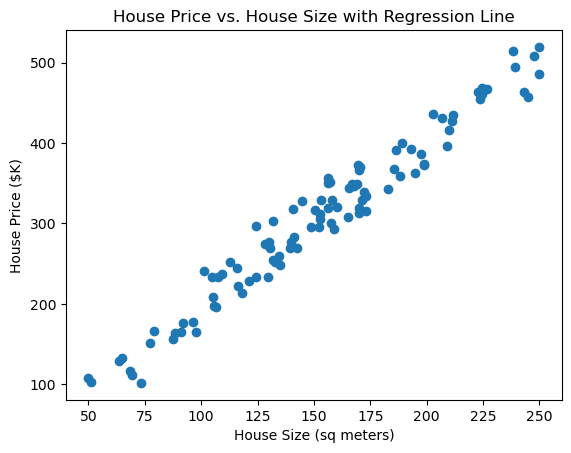

In [39]:
plt.scatter(X, y)
plt.plot(X, w * X + b, color='red')  # regression line
plt.xlabel('House Size (sq meters)')
plt.ylabel('House Price ($K)')
plt.title('House Price vs. House Size with Regression Line')
plt.show()

In [45]:
print(houses_prices_df)

    House Size (sq meters)  House Price
0               238.202617   514.068249
1               170.007860   313.060540
2               198.936899   372.464098
3               250.000000   519.387934
4               243.377900   463.293331
..                     ...          ...
95              185.328658   367.226390
96              150.525001   316.485813
97              239.293525   495.057132
98              156.345605   355.955928
99              170.099468   366.929495

[100 rows x 2 columns]
